In [1]:
%matplotlib
%matplotlib inline
import sys
import numpy
sys.path.append('..')
import gillespy
import matplotlib.pyplot as plt

Using matplotlib backend: MacOSX


In [2]:
class Simple1(gillespy.Model):
    """
    This is a simple example for mass-action degradation of species S.
    """

    def __init__(self, parameter_values=None):

        # Initialize the model.
        gillespy.Model.__init__(self, name="simple1")

        # Parameters
        k1 = gillespy.Parameter(name='k1', expression=0.3)
        self.add_parameter(k1)

        # Species
        S = gillespy.Species(name='S', initial_value=100)
        self.add_species(S)

        # Reactions
        rxn1 = gillespy.Reaction(
                name = 'S degradation',
                reactants = {S:1},
                products = {},
                rate = k1 )
        self.add_reaction(rxn1)
        self.timespan(numpy.linspace(0,20,101))


In [3]:
# Here, we create the model object.
# We could pass new parameter values to this model here if we wished
simple_model = Simple1()

# The model object is simulated with the StochKit solver, and 25 
# trajectories are returned.
num_trajectories = 250
simple_trajectories = simple_model.run(number_of_trajectories = num_trajectories, show_labels=False)


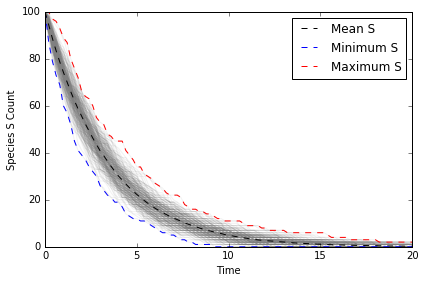

In [6]:
# PLOTTING


# here, we will plot all trajectories with the mean overlaid
from matplotlib import gridspec

gs = gridspec.GridSpec(1,1)


ax0 = plt.subplot(gs[0,0])

# extract time values
time = numpy.array(simple_trajectories[0][:,0])

# extract just the trajectories for S into a numpy array
S_trajectories = numpy.array([simple_trajectories[i][:,1] for i in xrange(num_trajectories)]).T

#plot individual trajectories
ax0.plot(time, S_trajectories, 'gray', alpha = 0.1)

#plot mean
ax0.plot(time, S_trajectories.mean(1), 'k--', label = "Mean S")

#plot min-max
ax0.plot(time,S_trajectories.min(1), 'b--', label = "Minimum S")
ax0.plot(time,S_trajectories.max(1), 'r--', label = "Maximum S")

ax0.legend()
ax0.set_xlabel('Time')
ax0.set_ylabel('Species S Count')

plt.tight_layout()
plt.show()